## **Preparation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
anime = pd.read_csv("../input/anime-recommendations-database/anime.csv")
rating = pd.read_csv("../input/anime-recommendations-database/rating.csv")

In [3]:
print(f"Shape of The Anime Dataset : {anime.shape}")
anime.head()

Shape of The Anime Dataset : (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [5]:
print(f"Shape of The Rating Dataset : {rating.shape}")
rating.head()

Shape of The Rating Dataset : (7813737, 3)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [7]:
print(f"Summary of The Anime Dataset :")
anime.describe()

Summary of The Anime Dataset :


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
anime.describe(include=object)

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [9]:
print("Null Values of Anime Dataset :")
anime.isna().sum()

Null Values of Anime Dataset :


anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
print("After Dropping, Null Values of Anime Dataset :")
anime.dropna(axis = 0, inplace = True)
anime.isna().sum()

After Dropping, Null Values of Anime Dataset :


anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [11]:
dup_anime = anime[anime.duplicated()].shape[0]
print(f"There are {dup_anime} duplicate entries among {anime.shape[0]} entries in anime dataset.")

There are 0 duplicate entries among 12017 entries in anime dataset.


In [12]:
print(f"Summary of The Rating Dataset :")
rating.describe()

Summary of The Rating Dataset :


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [13]:
print("Null Values of Rating Dataset :")
rating.isna().sum()

Null Values of Rating Dataset :


user_id     0
anime_id    0
rating      0
dtype: int64

In [14]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


In [15]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes=[None, "_user"])
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})

print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head(10)

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10


# **EDA**

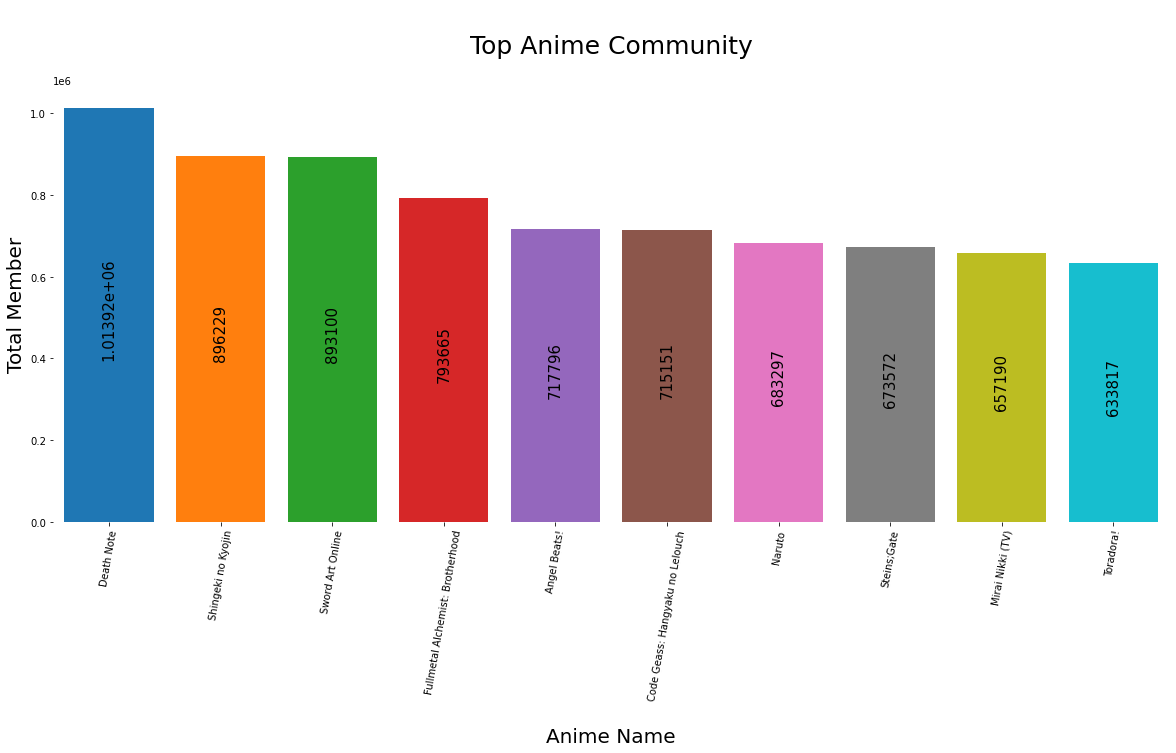

In [16]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:10],
                y=top_anime_temp1["members"], 
                saturation = 1, 
                linewidth = 1)

p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 80)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90)

sns.despine(left=True, bottom=True)
plt.show()

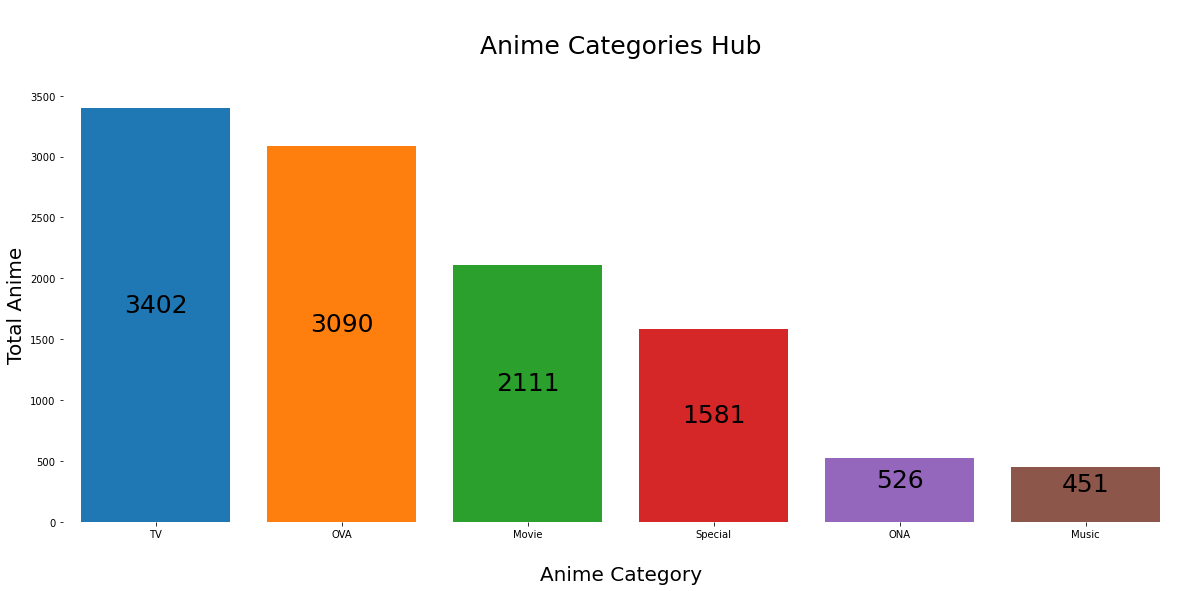

In [17]:
plt.subplots(figsize = (20,8))
p = sns.countplot(x = top_anime_temp1["type"], 
                  order = top_anime_temp1["type"].value_counts().index, saturation = 1,linewidth = 3)

p.axes.set_title("\nAnime Categories Hub\n" ,fontsize = 25)
plt.ylabel("Total Anime" ,fontsize = 20)
plt.xlabel("\nAnime Category" ,fontsize = 20)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 25,color = "black",rotation = 0)

sns.despine(left = True, bottom = True)
plt.show()

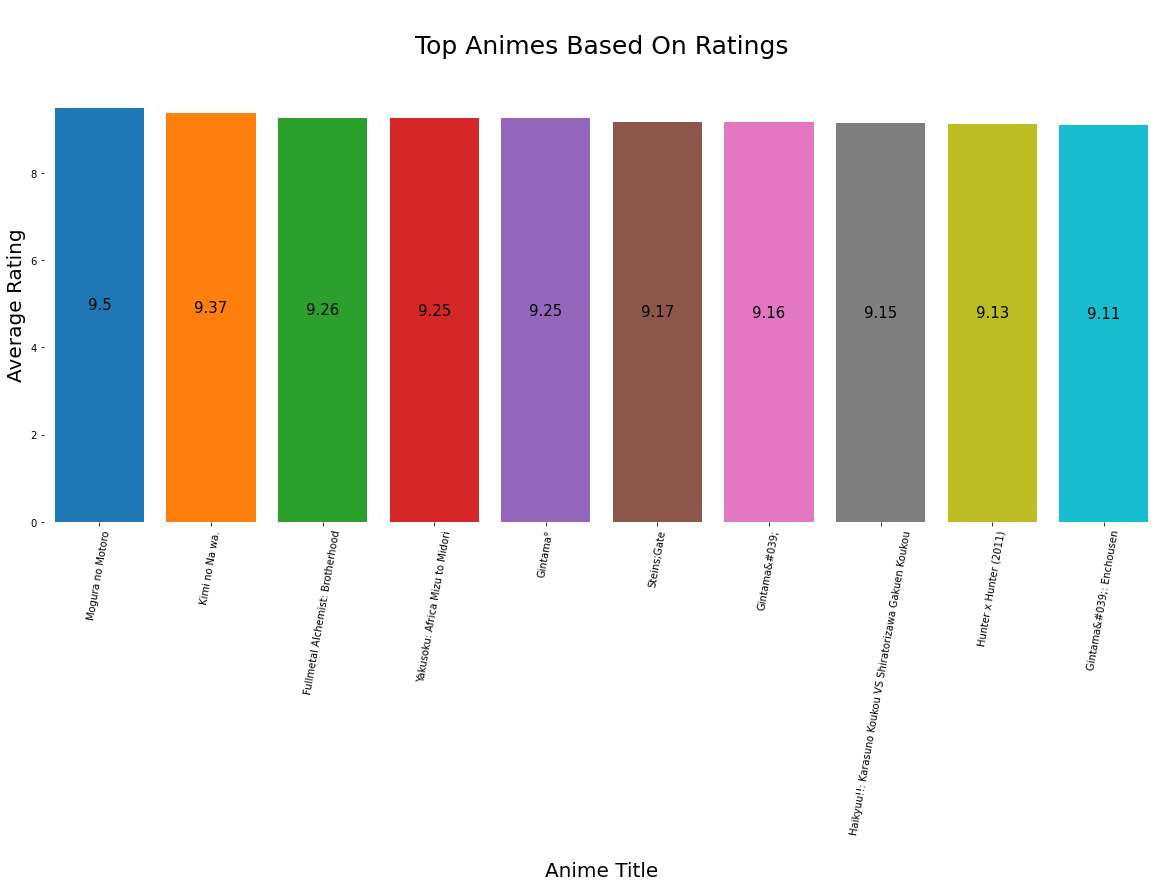

In [18]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp2["name"][:10],y=top_anime_temp2["rating"], saturation=1, linewidth = 2)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25)
plt.ylabel("Average Rating",fontsize = 20)
plt.xlabel("\nAnime Title",fontsize = 20)

plt.xticks(rotation = 80)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0)

sns.despine(left=True, bottom=True)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Total unique genres are 43


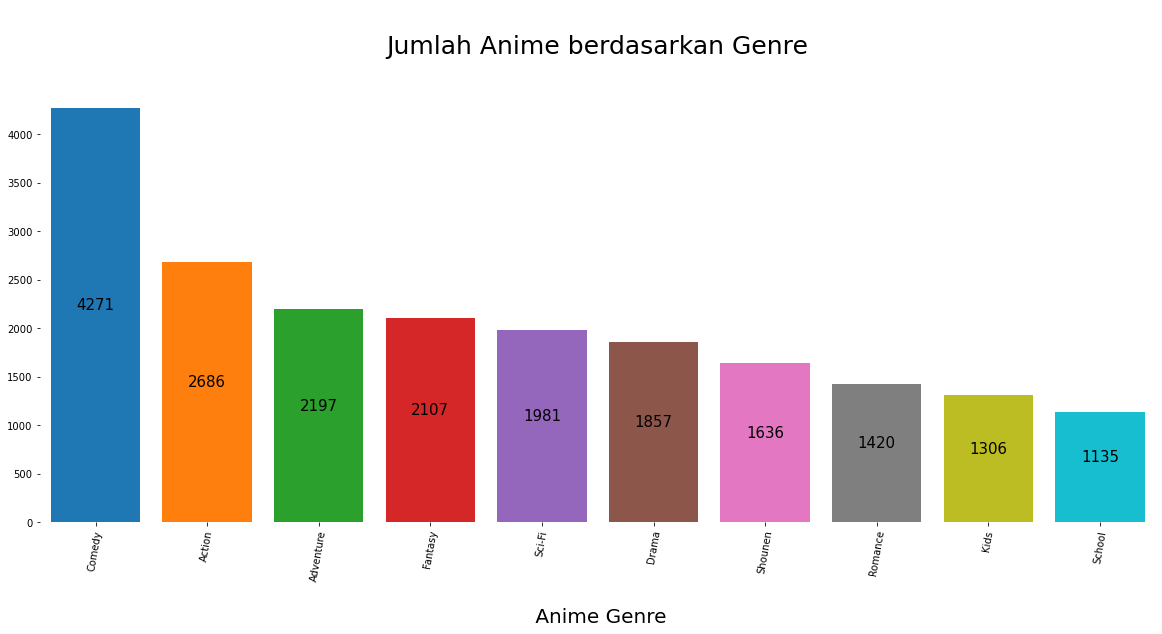

In [19]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()
print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
top_anime_temp3["genre"].value_counts().to_frame().head(10)

df = top_anime_temp3["genre"].value_counts().to_frame().head(10)
plt.subplots(figsize=(20,8))
p = sns.barplot(x=df.index, y=df["genre"],saturation=1, linewidth = 2)
p.axes.set_title("\nJumlah Anime berdasarkan Genre\n",fontsize = 25)
plt.ylabel("",fontsize = 20)
plt.xlabel("\n Anime Genre",fontsize = 20)

plt.xticks(rotation = 80)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0)

sns.despine(left=True, bottom=True)
plt.show()

In [20]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum()

Null values after final pre-processing :


anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
user_rating    0
dtype: int64

There are a lot of users who have rated only once, even if they have rated 5 animes, it can't be considered as a valuable record for recommendation. So we will consider minimum 50 ratings by the user as a threshold value.

In [21]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

We will create a pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity.

In [22]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

In [23]:
df = pd.DataFrame(data)
df.head(50)

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10.0
10,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10.0
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10.0
12,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,612,9.0


## **MODELLING**

In [24]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [25]:
user_ids = df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
anime_ids = df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
df["user"] = df["user_id"].map(user2user_encoded)
df["anime"] = df["anime_id"].map(anime2anime_encoded)

num_users = len(user2user_encoded)
num_anime = len(anime_encoded2anime)
df["user_rating"] = df["user_rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["user_rating"])
max_rating = max(df["user_rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_anime, min_rating, max_rating
    )
)

Number of users: 32967, Number of Movies: 9874, Min rating: 1.0, Max rating: 10.0


In [26]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "anime"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["user_rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [27]:
EMBEDDING_SIZE = 128

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)
        self.dense_1 = layers.Dense(64, activation='relu')
        self.dense_2 = layers.Dense(32, activation='relu')
        self.dense_3 = layers.Dense(1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


In [28]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2023-01-26 16:00:09.953146: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 16:00:10.054309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 16:00:10.055537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 16:00:10.057815: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [29]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 512,
    epochs = 10,
    validation_data = (x_val, y_val)
)

2023-01-26 16:00:12.844697: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
8900/8900 [==============================] - 42s 4ms/step - loss: 0.5591 - root_mean_squared_error: 0.1648 - val_loss: 0.5608 - val_root_mean_squared_error: 0.1613
Epoch 2/10
8900/8900 [==============================] - 39s 4ms/step - loss: 0.5627 - root_mean_squared_error: 0.1599 - val_loss: 0.5637 - val_root_mean_squared_error: 0.1575
Epoch 3/10
8900/8900 [==============================] - 40s 4ms/step - loss: 0.5646 - root_mean_squared_error: 0.1566 - val_loss: 0.5644 - val_root_mean_squared_error: 0.1546
Epoch 4/10
8900/8900 [==============================] - 39s 4ms/step - loss: 0.5648 - root_mean_squared_error: 0.1540 - val_loss: 0.5642 - val_root_mean_squared_error: 0.1522
Epoch 5/10
8900/8900 [==============================] - 40s 4ms/step - loss: 0.5638 - root_mean_squared_error: 0.1515 - val_loss: 0.5627 - val_root_mean_squared_error: 0.1496
Epoch 6/10
8900/8900 [==============================] - 39s 4ms/step - loss: 0.5625 - root_mean_squared_error: 0.1494 - val_l

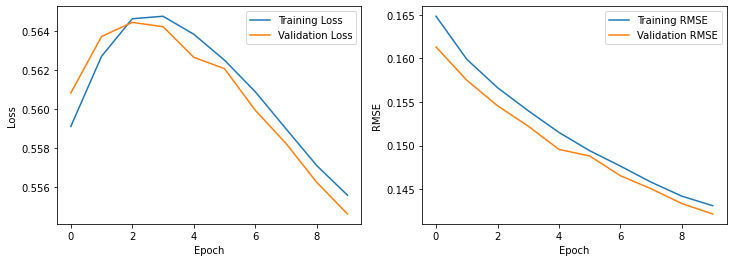

In [33]:
import matplotlib.pyplot as plt

# Extract the training and validation loss and rmse
loss = history.history['loss']
val_loss = history.history['val_loss']
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the loss on the first subplot
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the rmse on the second subplot
ax2.plot(rmse, label='Training RMSE')
ax2.plot(val_rmse, label='Validation RMSE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('RMSE')
ax2.legend()

plt.show()
